In [12]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [15]:
df=pd.read_csv('/content/car_evaluation.csv')

In [16]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [17]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [18]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:

    print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [19]:
X = df.drop(['class'], axis=1)

y = df['class']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43)

In [21]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [23]:
rfc = RandomForestClassifier(n_estimators=10, random_state=1)

rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [24]:
y_pred = rfc.predict(X_test)

In [26]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 10 decision-trees : 0.9018


In [27]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=1)
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))


Model accuracy score with 100 decision-trees : 0.9263


In [28]:
clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [29]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.263647
persons     0.231796
maint       0.178122
buying      0.171697
lug_boot    0.079475
doors       0.075263
dtype: float64

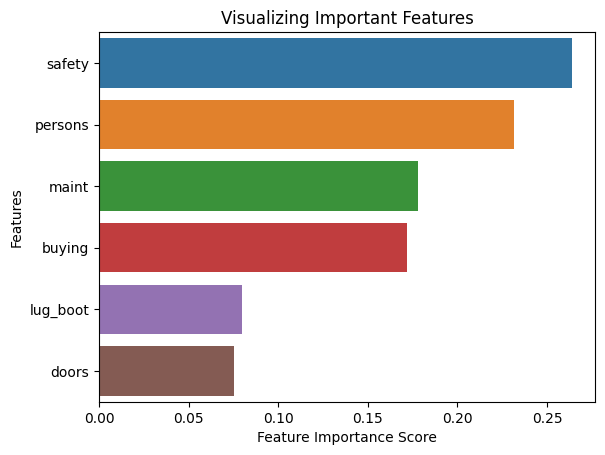

In [30]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [31]:
X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 43)

In [33]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [34]:
clf = RandomForestClassifier(random_state=1)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9368


In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[106   0   6   3]
 [  7  20   0   2]
 [ 14   2 389   0]
 [  1   1   0  19]]


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.83      0.92      0.87       115
        good       0.87      0.69      0.77        29
       unacc       0.98      0.96      0.97       405
       vgood       0.79      0.90      0.84        21

    accuracy                           0.94       570
   macro avg       0.87      0.87      0.86       570
weighted avg       0.94      0.94      0.94       570



##Result Conclusion


In [ ]:
#1. In this project, I build a Random Forest Classifier to predict the safety of the car. I build two models, one with 10 decision-trees and another one with 100 decision-trees.
#2. The model accuracy score with 10 decision-trees is 0.9018 but the same with 100 decision-trees is 0.9263. So, as expected accuracy increases with number of decision-trees in the model.
#3. I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. The most important feature is safety and least important feature is doors.
#4. I have removed the doors variable from the model, rebuild it and checked its accuracy. The accuracy of the model with doors variable removed is  0.9368. The accuracy of the model with all the variables taken into account is 0.9018. So, we can see that the model accuracy has been improved with doors variable removed from the model.
#5. The second least important model is lug_boot. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.
#6. Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.